<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/recaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# https://www.youtube.com/watch?v=aGVWXhINpTE

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from scipy.io import wavfile
from IPython.display import Audio

In [10]:
def recaman(n):
    result = [0]

    for i in range(1, n):
        t1 = result[-1] - i
        t2 = result[-1] + i

        if (t1 > 0) and (t1 not in result):
            result.append(t1)
        else:
            result.append(t2)

    return result

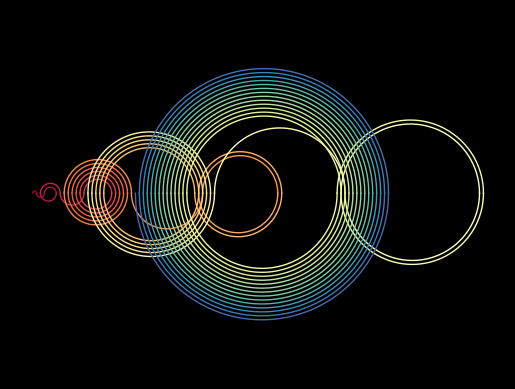

In [12]:
n = 66
rec = recaman(n)

def add_to_plot(i, ax, cm):
    # Arc centre and radius.
    c, r = (rec[i + 1] + rec[i]) / 2, abs(rec[i + 1] - rec[i]) / 2
    x = np.linspace(-r, r, 1000)
    y = np.sqrt(r**2 - x**2) * (-1)**i
    color = cm(i / n)
    ax.plot(x + c, y, c=color, lw=1)

# Equal aspect ratio Figure with black background and no axes.
fig, ax = plt.subplots(facecolor='k')
ax.axis('equal')
ax.axis('off')

# Colour the lines sequentially from a Matplotlib colormap.
cm = plt.get_cmap('Spectral')

for i in range(0, n - 2):
    add_to_plot(i, ax, cm)

plt.savefig('recaman.png', dpi=300)

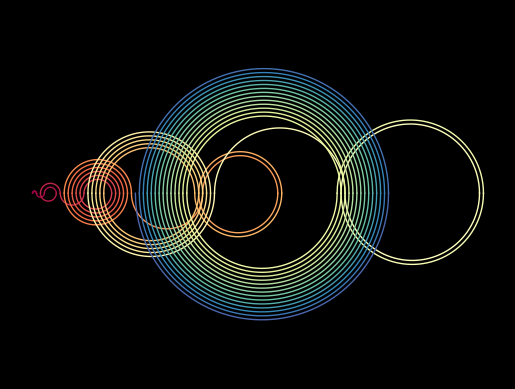

In [13]:
def animate(i):
    # Arc centre and radius.
    c, r = (rec[i + 1] + rec[i]) / 2, abs(rec[i + 1] - rec[i]) / 2
    x = np.linspace(-r, r, 1000)
    y = np.sqrt(r**2 - x**2) * (-1)**i
    color = cm(i / n)
    ax.plot(x+c, y, c=color, lw=1)

# Equal aspect ratio Figure with black background and no axes.
fig, ax = plt.subplots(facecolor='k')
ax.axis('equal')
ax.axis('off')

ani = animation.FuncAnimation(fig, animate, frames=n-2, interval=50)
ani.save('recaman.gif', writer='pillow', fps=1/0.3, dpi=200)

In [16]:
freqs = np.array([65.41, 77.78, 87.31, 92.5, 98, 116.54, 130.81, 155.56,
                  174.61, 185, 196, 233.06, 261.63, 311.13, 349.23,
                  369.99, 392, 466.16, 523.25, 622.25, 698.46, 783.99])

sr = 2 * 4096 #  sample rate corresponding to one sec
ns = 0.2 #  length of tone in sec
dd = []

for i in range(n):
    f1 = freqs[rec[i] % len(freqs)]
    x1 = np.linspace(0, ns * 2 * np.pi * f1, int(ns * sr))
    signal = np.sum(np.array([(1 / (1.7)**i) * np.sin(i * x1) for i in range(10)]), axis=0)
    dd.append(signal)

dd = np.array(dd).ravel()

wavfile.write('recaman.wav', sr, dd.astype('float32'))

Audio('recaman.wav')